Question 3. Data pre-processing: This involves transforming raw data into an understandable format.

In [2]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
import sklearn 
plt.style.use('ggplot')
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.formula.api as smf

In [3]:
#Importing Dataset
data = pd.read_csv('card.csv', sep=',', skiprows=range(0, 1))

In [4]:
#Check if there are any duplicate IDs
duplicate_column_df = data[data["ID"].duplicated()] #no duplicate IDs

In [5]:
#Set ID as index
data.set_index('ID', inplace = True)

In [6]:
#Remove rows with BILL_AMTs and PAY_AMTs = 0 
indexNames = data[(data['BILL_AMT1'] == 0 ) & (data['BILL_AMT2'] == 0 ) & (data['BILL_AMT3'] == 0 )& 
                 (data['BILL_AMT4'] == 0 ) & (data['BILL_AMT5'] == 0) & (data['BILL_AMT6'] == 0) ].index
data = data.drop(indexNames)

In [7]:
#Check if there are irrelevant data in Marriage (categorical data)
data["MARRIAGE"].unique() # 0 is irrelevant datas

array([1, 2, 3, 0], dtype=int64)

In [8]:
#Check if there are irrelevant in Education (categorical data)
data["EDUCATION"].unique() # 6 and 0 are  irrelevant datas 

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [9]:
#Check if there are irrelevant in PAY_0 (categorical data)
data["PAY_0"].unique() #-2 and 0 are irrelevant datas 

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [10]:
#Check if there are irrelevant in PAY_0 to PAY_5 (categorical data)
data["PAY_0"].unique() 
data["PAY_2"].unique()
data["PAY_3"].unique()
data["PAY_4"].unique()
data["PAY_5"].unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)

In [11]:
#Remove rows which values are not justified in the data description (Marriage == 0, PAY == 0 & -2, EDUCATION == 0 & 6)
data.drop(data[data["MARRIAGE"] == 0].index, inplace=True)
data.drop(data[data["PAY_0"] == 0].index, inplace=True)
data.drop(data[data["PAY_2"] == 0].index, inplace=True)
data.drop(data[data["PAY_3"] == 0].index, inplace=True)
data.drop(data[data["PAY_4"] == 0].index, inplace=True)
data.drop(data[data["PAY_5"] == 0].index, inplace=True)
data.drop(data[data["PAY_6"] == 0].index, inplace=True)
data.drop(data[data["PAY_0"] == -2].index, inplace=True)
data.drop(data[data["PAY_2"] == -2].index, inplace=True)
data.drop(data[data["PAY_3"] == -2].index, inplace=True)
data.drop(data[data["PAY_4"] == -2].index, inplace=True)
data.drop(data[data["PAY_5"] == -2].index, inplace=True)
data.drop(data[data["PAY_6"] == -2].index, inplace=True)
data.drop(data[data["EDUCATION"] == 0].index, inplace=True)
data.drop(data[data["EDUCATION"] == 6].index, inplace=True)

In [12]:
##Checking for missing values
data.isna().sum() #no missing value

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [13]:
#Renaming the data column for better understanding 

data.rename(columns = {'PAY_0' : 'STATUS_SEP'}, inplace = True)
data.rename(columns = {'PAY_2' : 'STATUS_AUG'}, inplace = True)
data.rename(columns = {'PAY_3' : 'STATUS_JUL'}, inplace = True)
data.rename(columns = {'PAY_4' : 'STATUS_JUN'}, inplace = True)
data.rename(columns = {'PAY_5' : 'STATUS_MAY'}, inplace = True)
data.rename(columns = {'PAY_6' : 'STATUS_APR'}, inplace = True)
data.rename(columns = {'BILL_AMT1' : 'BILL_SEP'}, inplace = True)
data.rename(columns = {'BILL_AMT2' : 'BILL_AUG'}, inplace = True)
data.rename(columns = {'BILL_AMT3' : 'BILL_JUL'}, inplace = True)
data.rename(columns = {'BILL_AMT4' : 'BILL_JUN'}, inplace = True)
data.rename(columns = {'BILL_AMT5' : 'BILL_MAY'}, inplace = True)
data.rename(columns = {'BILL_AMT6' : 'BILL_APR'}, inplace = True)
data.rename(columns = {'PAY_AMT1' : 'PAY_SEP'}, inplace = True)
data.rename(columns = {'PAY_AMT2' : 'PAY_AUG'}, inplace = True)
data.rename(columns = {'PAY_AMT3' : 'PAY_JUL'}, inplace = True)
data.rename(columns = {'PAY_AMT4' : 'PAY_JUN'}, inplace = True)
data.rename(columns = {'PAY_AMT5' : 'PAY_MAY'}, inplace = True)
data.rename(columns = {'PAY_AMT6' : 'PAY_APR'}, inplace = True)
data.rename(columns = {'default payment next month' : 'default'}, inplace = True)

In [14]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,default
ID,,,,,,,,,,,,,,,,,,,,,
12,260000,2,1,2,51,-1,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0
22,120000,2,2,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
29,50000,2,3,1,47,-1,-1,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
31,230000,2,1,2,27,-1,-1,-1,-1,-1,...,15339,14307,36923,17270,13281,15339,14307,37292,0,0
49,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018,11849,11873,21540,15138,24677,11851,11875,8251,0


In [15]:
#Type of data 
type(data)

pandas.core.frame.DataFrame

In [16]:
#Information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4042 entries, 12 to 29995
Data columns (total 24 columns):
LIMIT_BAL     4042 non-null int64
SEX           4042 non-null int64
EDUCATION     4042 non-null int64
MARRIAGE      4042 non-null int64
AGE           4042 non-null int64
STATUS_SEP    4042 non-null int64
STATUS_AUG    4042 non-null int64
STATUS_JUL    4042 non-null int64
STATUS_JUN    4042 non-null int64
STATUS_MAY    4042 non-null int64
STATUS_APR    4042 non-null int64
BILL_SEP      4042 non-null int64
BILL_AUG      4042 non-null int64
BILL_JUL      4042 non-null int64
BILL_JUN      4042 non-null int64
BILL_MAY      4042 non-null int64
BILL_APR      4042 non-null int64
PAY_SEP       4042 non-null int64
PAY_AUG       4042 non-null int64
PAY_JUL       4042 non-null int64
PAY_JUN       4042 non-null int64
PAY_MAY       4042 non-null int64
PAY_APR       4042 non-null int64
default       4042 non-null int64
dtypes: int64(24)
memory usage: 789.5 KB


In [17]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,default
ID,,,,,,,,,,,,,,,,,,,,,
12,260000,2,1,2,51,-1,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0
22,120000,2,2,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
29,50000,2,3,1,47,-1,-1,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
31,230000,2,1,2,27,-1,-1,-1,-1,-1,...,15339,14307,36923,17270,13281,15339,14307,37292,0,0
49,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018,11849,11873,21540,15138,24677,11851,11875,8251,0


In [18]:
#Chi Square test for Sex and Default
chi2_contingency(pd.crosstab(data.SEX, data.default))
# Since P-value is < 0.05, Sex and Marriage are dependent

(14.540050425646458,
 0.00013721133230779962,
 1,
 array([[1062.51558634,  585.48441366],
        [1543.48441366,  850.51558634]]))

In [19]:
#Chi Square test for Education and Default
chi2_contingency(pd.crosstab(data.EDUCATION, data.default))
# Since P-value is < 0.05, Education and Default are dependent

(82.63662213522258,
 4.810761518451748e-17,
 4,
 array([[1085.08114795,  597.91885205],
        [1104.42305789,  608.57694211],
        [ 402.31172687,  221.68827313],
        [   6.44730332,    3.55269668],
        [   7.73676398,    4.26323602]]))

In [20]:
#Chi Square test for Marriage and Default
chi2_contingency(pd.crosstab(data.MARRIAGE, data.default))
# Since P-value is > 0.05, Marriage and Default are independent

(3.526968891908112,
 0.1714464260109802,
 2,
 array([[1342.97328055,  740.02671945],
        [1241.10588817,  683.89411183],
        [  21.92083127,   12.07916873]]))

In [21]:
#Since Chi Square test can only be used with positive variables, we will change the -1 values for 
#STATUS_SEP to STATUS_APR to 10 (paid on time)

data[data.columns[5:11]] = data[data.columns[5:11]].replace(-1,0) #replace -1 values with 0 
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,default
ID,,,,,,,,,,,,,,,,,,,,,
12,260000,2,1,2,51,0,0,0,0,0,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0
22,120000,2,2,1,39,0,0,0,0,0,...,0,632,316,316,316,0,632,316,0,1
29,50000,2,3,1,47,0,0,0,0,0,...,2040,30430,257,3415,3421,2044,30430,257,0,0
31,230000,2,1,2,27,0,0,0,0,0,...,15339,14307,36923,17270,13281,15339,14307,37292,0,0
49,380000,1,2,2,32,0,0,0,0,0,...,32018,11849,11873,21540,15138,24677,11851,11875,8251,0


In [22]:
#Chi Square test for STATUS_SEP and default
chi2_contingency(pd.crosstab(data.STATUS_SEP, data.default))
# Since P-value is < 0.05, STATUS_SEP and Default are dependent

(1072.697384865657,
 3.0153960187012304e-226,
 8,
 array([[1.53381346e+03, 8.45186541e+02],
        [4.08759030e+02, 2.25240970e+02],
        [5.11271153e+02, 2.81728847e+02],
        [1.04446314e+02, 5.75536863e+01],
        [2.19208313e+01, 1.20791687e+01],
        [5.80257298e+00, 3.19742702e+00],
        [1.93419099e+00, 1.06580901e+00],
        [5.80257298e+00, 3.19742702e+00],
        [1.22498763e+01, 6.75012370e+00]]))

In [23]:
#Chi Square test for STATUS_AUG and default
chi2_contingency(pd.crosstab(data.STATUS_AUG, data.default))
# Since P-value is < 0.05, STATUS_AUG and Default are dependent

(1034.929253778938,
 4.305057519072598e-218,
 8,
 array([[1.58087877e+03, 8.71121227e+02],
        [2.57892133e+00, 1.42107867e+00],
        [8.66517566e+02, 4.77482434e+02],
        [9.02622464e+01, 4.97377536e+01],
        [3.80390896e+01, 2.09609104e+01],
        [6.44730332e+00, 3.55269668e+00],
        [7.73676398e+00, 4.26323602e+00],
        [1.28946066e+01, 7.10539337e+00],
        [6.44730332e-01, 3.55269668e-01]]))

In [24]:
#Chi Square test for STATUS_JUL and default
chi2_contingency(pd.crosstab(data.STATUS_JUL, data.default))
# Since P-value is < 0.05, STATUS_JUL and Default are dependent

(984.2087763764775,
 3.8234059067139275e-207,
 8,
 array([[1.57249728e+03, 8.66502721e+02],
        [6.44730332e-01, 3.55269668e-01],
        [8.73609599e+02, 4.81390401e+02],
        [7.99465611e+01, 4.40534389e+01],
        [3.22365166e+01, 1.77634834e+01],
        [1.28946066e+01, 7.10539337e+00],
        [1.48287976e+01, 8.17120238e+00],
        [1.74077190e+01, 9.59228105e+00],
        [1.93419099e+00, 1.06580901e+00]]))

In [25]:
#Chi Square test for STATUS_JUN and default
chi2_contingency(pd.crosstab(data.STATUS_JUN, data.default))
# Since P-value is < 0.05, STATUS_JUN and Default are dependent

(1036.7306476949107,
 1.7582178260923745e-218,
 8,
 array([[1.62923355e+03, 8.97766452e+02],
        [6.44730332e-01, 3.55269668e-01],
        [8.03978723e+02, 4.43021277e+02],
        [6.89861455e+01, 3.80138545e+01],
        [3.99732806e+01, 2.20267194e+01],
        [2.19208313e+01, 1.20791687e+01],
        [2.57892133e+00, 1.42107867e+00],
        [3.73943592e+01, 2.06056408e+01],
        [1.28946066e+00, 7.10539337e-01]]))

In [26]:
#Chi Square test for STATUS_MAY and default
chi2_contingency(pd.crosstab(data.STATUS_MAY, data.default))
# Since P-value is < 0.05, STATUS_MAY and Default are dependent

(1058.1231770919414,
 3.3167598959439997e-224,
 7,
 array([[1.66082533e+03, 9.15174666e+02],
        [7.63360713e+02, 4.20639287e+02],
        [8.44596734e+01, 4.65403266e+01],
        [4.83547749e+01, 2.66452251e+01],
        [9.02622464e+00, 4.97377536e+00],
        [2.57892133e+00, 1.42107867e+00],
        [3.67496289e+01, 2.02503711e+01],
        [6.44730332e-01, 3.55269668e-01]]))

In [27]:
#Chi Square test for STATUS_APR and default
chi2_contingency(pd.crosstab(data.STATUS_APR, data.default))
# Since P-value is < 0.05, STATUS_APR and Default are dependent

(1010.8764625973655,
 5.379084678333198e-214,
 7,
 array([[1.63632558e+03, 9.01674419e+02],
        [8.14939139e+02, 4.49060861e+02],
        [8.05912914e+01, 4.44087086e+01],
        [2.64339436e+01, 1.45660564e+01],
        [7.09203365e+00, 3.90796635e+00],
        [9.67095497e+00, 5.32904503e+00],
        [2.96575952e+01, 1.63424048e+01],
        [1.28946066e+00, 7.10539337e-01]]))

In [28]:
#After doing Chi Square test for categorical variables and Logistic Regression for continuous variables
#We remove marriage as its p value is > 0.05, which indicates that the MARRIAGE is independent of default 

data.drop(columns = ['MARRIAGE'], inplace = True)

In [29]:
corr = data[data.columns[10:-1]].corr()
corr.style.background_gradient(cmap='coolwarm')

,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
BILL_SEP,1,0.956001,0.950097,0.925451,0.933881,0.906322,0.0817028,0.113925,0.0455609,0.0807436,0.111517,0.0899879
BILL_AUG,0.956001,1,0.957247,0.943262,0.942993,0.915201,0.229102,0.0977067,0.0737619,0.0783814,0.104461,0.0937765
BILL_JUL,0.950097,0.957247,1,0.945684,0.950741,0.922929,0.0998949,0.27108,0.0709557,0.0979719,0.0933914,0.104884
BILL_JUN,0.925451,0.943262,0.945684,1,0.949796,0.926762,0.108908,0.117963,0.276775,0.0986636,0.0935667,0.0871255
BILL_MAY,0.933881,0.942993,0.950741,0.949796,1,0.946383,0.0796387,0.103802,0.084136,0.231132,0.0842095,0.0922899
BILL_APR,0.906322,0.915201,0.922929,0.926762,0.946383,1,0.07393,0.0944849,0.086154,0.115324,0.275193,0.0428721
PAY_SEP,0.0817028,0.229102,0.0998949,0.108908,0.0796387,0.07393,1,0.359785,0.376043,0.326996,0.230994,0.215658
PAY_AUG,0.113925,0.0977067,0.27108,0.117963,0.103802,0.0944849,0.359785,1,0.318226,0.370128,0.250502,0.2445
PAY_JUL,0.0455609,0.0737619,0.0709557,0.276775,0.084136,0.086154,0.376043,0.318226,1,0.33702,0.253773,0.172293
PAY_JUN,0.0807436,0.0783814,0.0979719,0.0986636,0.231132,0.115324,0.326996,0.370128,0.33702,1,0.30905,0.240477


In [30]:
corr = data[data.columns[10:-1]].corr()

In [31]:
def retrieveCorr(data):
    corr = data[data.columns[10:-1]].corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    realmax = 0
    maxbilli = 0
    for i in range(corr.shape[0]):
        maxinside = 0
        for j in range(6):
            if corr.iloc[i,j] >= 0.9:
                maxinside += corr.iloc[i,j]
                if columns[j]:
                    columns[j] = False
        if maxinside > realmax:
            realmax = maxinside
            maxbilli = i;
    print(data.columns[i])

In [32]:
#BILL_AUG has the highest average correlation across all bill, hence, we keep this and remove the rest. 
retrieveCorr(data)

BILL_AUG


In [33]:
# Dropping all BILLs except BILL_AUG
data.drop(columns = ['BILL_SEP', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY', 'BILL_APR'], inplace = True)

In [34]:
#Feature Scaling
#This will help to limit the range and standerdise the variables so that they can all be compared on common grounds. 
#If they do not have the same scale, it will cause problems to the machine learning that we will be applying later on(as most machine learning models is based on euclidean distance). 
#This algorithm will also converge faster.

data['LIMIT_BAL'] = StandardScaler().fit_transform(data['LIMIT_BAL'].values.reshape(-1,1))
data['BILL_AUG'] = StandardScaler().fit_transform(data['BILL_AUG'].values.reshape(-1,1))
data['PAY_SEP'] = StandardScaler().fit_transform(data['PAY_SEP'].values.reshape(-1,1))
data['PAY_AUG'] = StandardScaler().fit_transform(data['PAY_AUG'].values.reshape(-1,1))
data['PAY_JUL'] = StandardScaler().fit_transform(data['PAY_JUL'].values.reshape(-1,1))
data['PAY_JUN'] = StandardScaler().fit_transform(data['PAY_JUN'].values.reshape(-1,1))
data['PAY_MAY'] = StandardScaler().fit_transform(data['PAY_MAY'].values.reshape(-1,1))
data['PAY_APR'] = StandardScaler().fit_transform(data['PAY_APR'].values.reshape(-1,1))

In [35]:
#Describing the data
data.describe()

,LIMIT_BAL,SEX,EDUCATION,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,STATUS_APR,BILL_AUG,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,default
count,4.042000e+03,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4.042000e+03,4.042000e+03,4.042000e+03,4.042000e+03,4.042000e+03,4.042000e+03,4.042000e+03,4042.000000
mean,-1.173398e-16,1.592281,1.751856,36.519545,0.771895,0.895101,0.923800,0.910440,0.881247,0.878278,4.570537e-17,-8.829322e-17,-2.407841e-17,-1.544754e-16,7.093397e-17,1.109948e-16,2.064433e-16,0.355270
std,1.000124e+00,0.491471,0.738872,9.176120,1.154881,1.225757,1.290566,1.367562,1.346538,1.308238,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,0.478654
min,-1.284742e+00,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.057839e+00,-4.281077e-01,-3.851381e-01,-3.525366e-01,-4.105707e-01,-3.402576e-01,-3.070117e-01,0.000000
25%,-8.873706e-01,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.821969e-01,-3.990367e-01,-3.587304e-01,-3.289473e-01,-3.807523e-01,-3.328968e-01,-3.070117e-01,0.000000
50%,-1.721024e-01,2.000000,2.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.022804e-01,-2.809126e-01,-2.522219e-01,-2.448170e-01,-2.802901e-01,-2.494124e-01,-2.368193e-01,0.000000
75%,5.431657e-01,2.000000,2.000000,43.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.050036e-03,-2.187227e-02,-1.783212e-02,-3.900778e-02,-4.066030e-02,-4.434482e-02,-5.852520e-02,1.000000
max,4.516878e+00,2.000000,5.000000,72.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.239589e+01,1.679427e+01,2.493297e+01,3.082029e+01,1.706652e+01,2.211301e+01,2.281985e+01,1.000000


In [36]:
# data.to_csv("processed_data_BT2101.csv")

In [37]:
#spliiting test and train set (to be done after feature selection)

from sklearn.model_selection import train_test_split
x = data.iloc[:, :-1].values
y = data["default"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)
x_train

array([[-0.33105092,  1.        ,  2.        , ..., -0.36997078,
         0.05101307, -0.30701174],
       [ 1.0200112 ,  2.        ,  1.        , ...,  0.51564886,
         0.58202855,  0.03062186],
       [-0.72842213,  2.        ,  2.        , ..., -0.41057071,
        -0.1851993 , -0.30701174],
       ...,
       [-1.20526759,  2.        ,  3.        , ...,  0.19391703,
         0.01335817, -0.29696511],
       [-0.64894789,  1.        ,  3.        , ..., -0.13990456,
        -0.08133392,  0.12834204],
       [-0.88737062,  1.        ,  2.        , ..., -0.13990456,
        -0.19230121, -0.17305673]])

In [38]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [39]:
#RBF Kernel
rbf_svc = SVC(kernel = 'rbf', C = 1, gamma = 0.001)
rbf_svc.fit(x_train,y_train)

#Predict
y_pred = rbf_svc.predict(x_test)


In [40]:
#Evaluation
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[452  98]
 [ 77 182]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       550
           1       0.65      0.70      0.68       259

    accuracy                           0.78       809
   macro avg       0.75      0.76      0.76       809
weighted avg       0.79      0.78      0.79       809

Accuracy: 0.7836835599505563
Precision: 0.65
Recall: 0.7027027027027027


In [58]:
# Finding best parameter
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001]}
 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(kernel = 'rbf'), param_grid, verbose=5)
 
# Train the classifier
clf_grid.fit(x_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)


C:\Users\Huang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.636, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.636, total=   0.7s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.636, total=   0.7s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.761, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.747, total=   0.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.749, total=   0.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.778, total=   0.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.777, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.778, total=   0.4s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.738, total=   0.5s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.749, total=   0.4s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   20.5s finished


Best Parameters:
 {'C': 1, 'gamma': 0.001}
Best Estimators:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [60]:
#Sigmoid kernel
sig_svc = SVC(kernel = 'sigmoid', C = 0.1, gamma = 1)
sig_svc.fit(x_train,y_train)

#Predict
y_pred2 = sig_svc.predict(x_test)


In [59]:
# Finding best parameter
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001]}
 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(kernel = 'sigmoid'), param_grid, verbose=5)
 
# Train the classifier
clf_grid.fit(x_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, gamma=1 ..................................................


C:\Users\Huang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.636, total=   0.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.636, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.636, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.636, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.636, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.636, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.636, total=   0.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.636, total=   0.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.636, total=   0.6s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.580, total=   0.5s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.573, total=   0.5s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   15.2s finished


Best Parameters:
 {'C': 0.1, 'gamma': 1}
Best Estimators:
 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [62]:
#Evaluation
cm = confusion_matrix(y_test, y_pred2)
cr = classification_report(y_test, y_pred2)
print(cm)
print(cr)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

[[550   0]
 [259   0]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       550
           1       0.00      0.00      0.00       259

    accuracy                           0.68       809
   macro avg       0.34      0.50      0.40       809
weighted avg       0.46      0.68      0.55       809

Accuracy: 0.6798516687268232


AttributeError: coef_ is only available when using a linear kernel

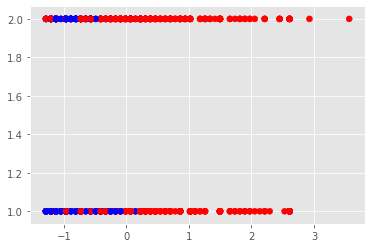

In [61]:
#Plotting
plt.scatter(x_train[:, 0], x_train[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [ ]:
#Polynomial Kernel
poly_svc = SVC(kernel='poly', degree=3, C=1.0, gamma = 'auto').fit(x, y)
poly_svc.fit(x_train, y_train)
y_pred = poly_svc.predict(x_test)

In [ ]:
#Evaluation
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

In [ ]:
#Neural Network Model
import tensorflow as tf
from tensorflow import keras

In [ ]:
All = data.shape[0]
female = data[data['SEX'] == 2]
male = data[data['SEX'] == 1]

x = len(female)/All
y = len(male)/All

print('Females :',x*100,'%')
print('Males :',y*100,'%')

In [ ]:
# Let's plot the Gender against the Frequency
labels = ['Females','Males']
classes = pd.value_counts(data['SEX'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Gender distribution")
plt.xticks(range(2), labels)
plt.xlabel("Gender")
plt.ylabel("Frequency")

Splitting the data
x_train is the training part of the matrix of features.
x_test is the test part of the matrix of features.
y_train is the training part of the dependent variable that is associated to X_train here.
y_test is the test part of the dependent variable that is associated to X_train here.

array([[130000,      1,      2, ...,   1496,   1496,   1496],
       [ 50000,      2,      1, ...,    450,    451,    475],
       [160000,      1,      1, ...,  11422,  12455,  24262],
       ...,
       [ 80000,      2,      2, ...,    390,   1884,      0],
       [180000,      2,      1, ...,   1000,    400,   1000],
       [180000,      1,      1, ...,   4069,   3018,   3069]])

Feature Scaling 


This will help to limit the range and standerdise the variables so that they can all be compared on common grounds. If they do not have the same scale, it will cause problems to the machine learning that we will be applying later on( as most machine learning models is based on euclidean distance). This algorithm will also converge faster. 


In [114]:
data['LIMIT_BAL'] = StandardScaler().fit_transform(data['LIMIT_BAL'].values.reshape(-1,1))
data['SEX'] = StandardScaler().fit_transform(data['SEX'].values.reshape(-1,1))
data['EDUCATION'] = StandardScaler().fit_transform(data['EDUCATION'].values.reshape(-1,1))
data['MARRIAGE'] = StandardScaler().fit_transform(data['MARRIAGE'].values.reshape(-1,1))
data['AGE'] = StandardScaler().fit_transform(data['AGE'].values.reshape(-1,1))
data['PAY_2'] = StandardScaler().fit_transform(data['PAY_2'].values.reshape(-1,1))
data['PAY_3'] = StandardScaler().fit_transform(data['PAY_3'].values.reshape(-1,1))
data['PAY_4'] = StandardScaler().fit_transform(data['PAY_4'].values.reshape(-1,1))
data['PAY_5'] = StandardScaler().fit_transform(data['PAY_5'].values.reshape(-1,1))
data['BILL_AMT1'] = StandardScaler().fit_transform(data['BILL_AMT1'].values.reshape(-1,1))
data['BILL_AMT2'] = StandardScaler().fit_transform(data['BILL_AMT2'].values.reshape(-1,1))
data['BILL_AMT3'] = StandardScaler().fit_transform(data['BILL_AMT3'].values.reshape(-1,1))
data['BILL_AMT4'] = StandardScaler().fit_transform(data['BILL_AMT4'].values.reshape(-1,1))
data['BILL_AMT5'] = StandardScaler().fit_transform(data['BILL_AMT5'].values.reshape(-1,1))
data['BILL_AMT6'] = StandardScaler().fit_transform(data['BILL_AMT6'].values.reshape(-1,1))
data['PAY_AMT1'] = StandardScaler().fit_transform(data['PAY_AMT1'].values.reshape(-1,1))
data['PAY_AMT2'] = StandardScaler().fit_transform(data['PAY_AMT2'].values.reshape(-1,1))
data['PAY_AMT3'] = StandardScaler().fit_transform(data['PAY_AMT3'].values.reshape(-1,1))
data['PAY_AMT4'] = StandardScaler().fit_transform(data['PAY_AMT4'].values.reshape(-1,1))
data['PAY_AMT5'] = StandardScaler().fit_transform(data['PAY_AMT5'].values.reshape(-1,1))
data['PAY_AMT6'] = StandardScaler().fit_transform(data['PAY_AMT6'].values.reshape(-1,1))
data['default payment next month'] = StandardScaler().fit_transform(data['default payment next month'].values.reshape(-1,1))

Plot the distribution of features 

In [116]:
#distribution of gender

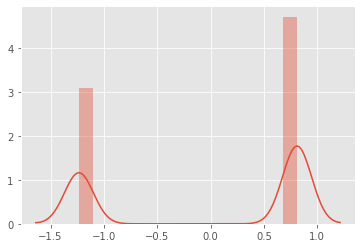

In [117]:
gender_distribution = [data['SEX'].values]
sns.distplot(gender_distribution)

In [118]:
#distribution of anomalous feature 

/Users/mingwei/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/mingwei/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/mingwei/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


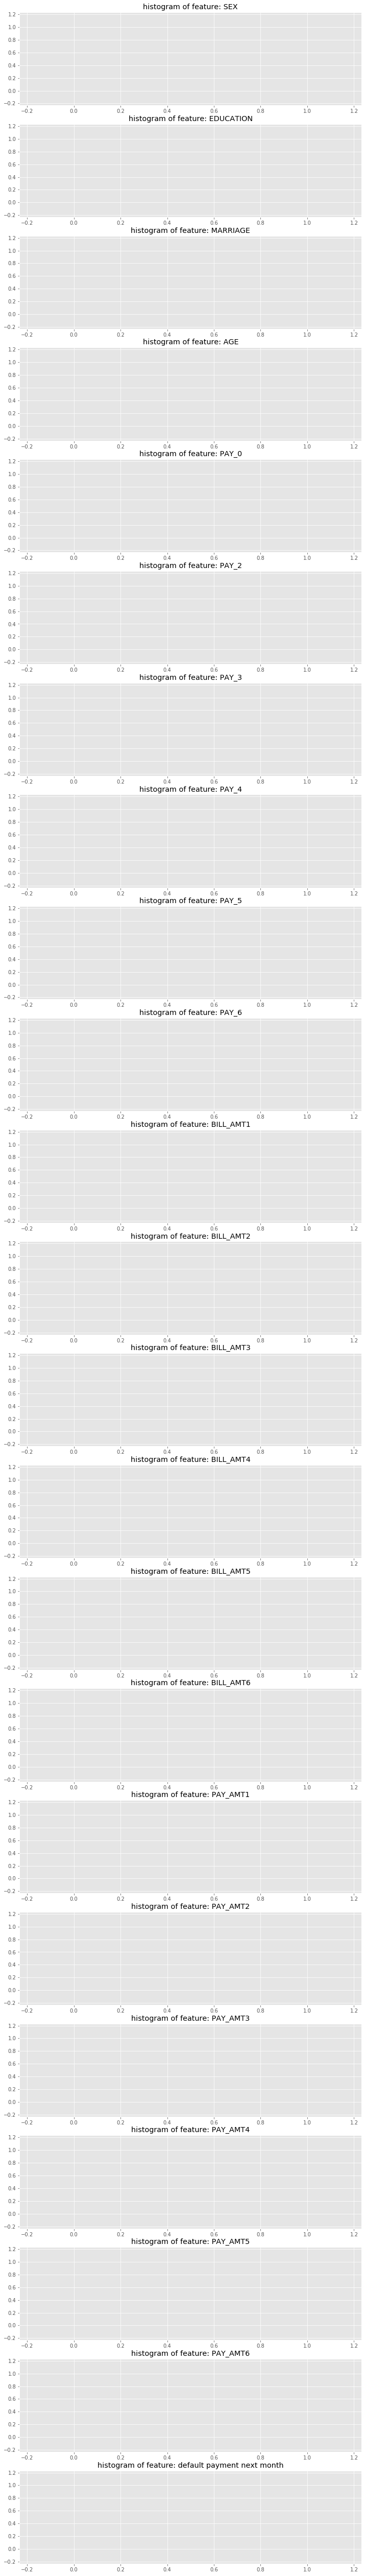

In [119]:
anomalous_features = data.iloc[:,1:29].columns
plt.figure(figsize=(12,28*4))
gs = matplotlib.gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.SEX == 1], bins=50)
    sns.distplot(data[cn][data.SEX == 2], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [85]:
data[data["Age"]]

KeyError: 'Age'